<!--<div align="center">Семинар № 5-->

<div align="center"><font color=#4682B4 size=5 face=
                          "segoe print"><em><strong>Семинар № 10</strong></em></font></div>

<div class="alert alert-block alert-info"><em>
<b>ЗАДАЧА № 1.</b> Провести дисперсионный анализ для определения того,<br>
есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.<br>
Даны значения роста в трех группах случайно выбранных спортсменов:<br>
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.<br>
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.<br>
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.
</em></div>

In [7]:

f = [173, 175, 180, 178, 177, 185, 183, 182]
h = [177, 179, 180, 188, 177, 172, 171, 184, 180]
w = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]


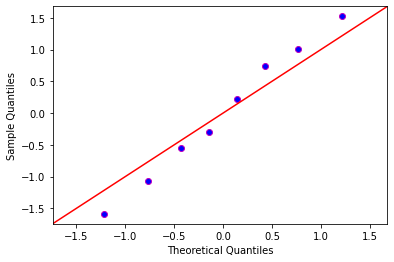

In [8]:
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
f_n = np.array(f)
fig = sm.qqplot(f_n, fit=True, c='m', line="45")
plt.show()

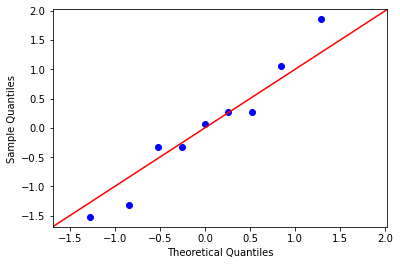

In [9]:
h_n = np.array(h)
fig = sm.qqplot(h_n, fit=True, c='b', line="45")
plt.show()

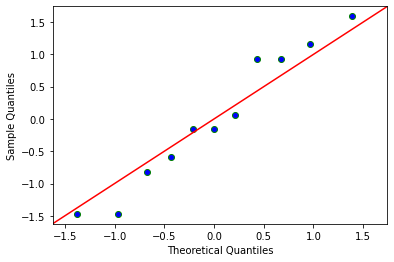

In [10]:
w_n = np.array(w)
fig = sm.qqplot(w_n, fit=True, c='g', line="45")
plt.show()

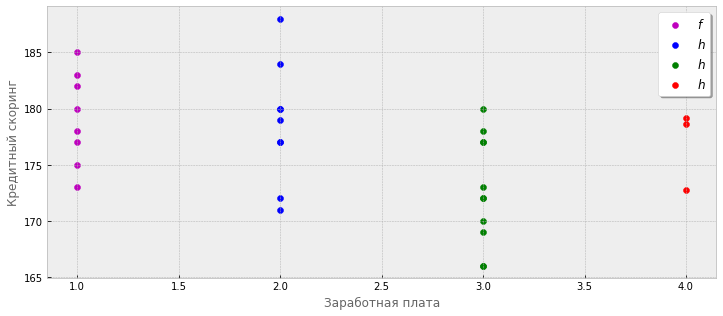

In [11]:
x = np.arange(0, 4, 10)
xf = [1]*8
xh = [2]*9
xw = [3]*11
xm = [4]*3
m = [np.mean(f), np.mean(h), np.mean(w)]

with plt.style.context('bmh'):
    plt.figure(figsize=(12, 5))
    plt.xlabel('Заработная плата', c = 'k', alpha=0.6)
    plt.ylabel('Кредитный скоринг', c = 'k', alpha=0.6)
#     plt.plot(x, y_n, c = 'k', alpha=0.5,  ls = '--', label="$ks = 200 + 2 zp $")
#     plt.plot(x, y_v, c = 'k', alpha=0.5, ls = '--', label="$ks = 600 + 4 zp $")
#     plt.fill_between (x, y_n, y_v, color='b', alpha= .05)
#    plt.plot(x, y_i, c = 'g', alpha=1, ls = '--', label="$искомая$ $прямая(примерно)$")
    plt.scatter(xf, f, c = 'm', label="$f$")
    plt.scatter(xh,h, c = 'b', label="$h$")
    plt.scatter(xw,w, c = 'g', label="$h$")
    plt.scatter(xm,m, c = 'r', label="$h$")
    plt.legend(fontsize='large', facecolor='w', shadow=True)

plt.show()

In [12]:
st.shapiro(f)

ShapiroResult(statistic=0.9775081872940063, pvalue=0.9495400786399841)

In [13]:
st.shapiro(h)

ShapiroResult(statistic=0.957919716835022, pvalue=0.7763141393661499)

In [14]:
st.shapiro(w)

ShapiroResult(statistic=0.9386807680130005, pvalue=0.5051150918006897)

In [15]:
st.bartlett(f, h, w)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

In [16]:
st.levene(f, h, w, center='median')

LeveneResult(statistic=0.0836323510368345, pvalue=0.920025568103872)

In [17]:
st.levene(f, h, w, center='mean')

LeveneResult(statistic=0.11046961071348868, pvalue=0.8958481763722974)

In [18]:
st.f_oneway(f, h, w)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

In [23]:
print(f'Средний рост футболистов = {f_n.mean():.2f}')
print(f'Средний рост хоккеистов = {h_n.mean():.2f}')
print(f'Средний рост штангистов = {w_n.mean():.2f}')

Средний рост футболистов = 179.12
Средний рост хоккеистов = 178.67
Средний рост штангистов = 172.73


In [26]:
s_n = np.concatenate([f_n, h_n, w_n])
print(f'Средний рост спортсменов = {s.mean():.2f}')

Средний рост спортсменов = 176.46


In [33]:
Sf = (f_n.mean() - s_n.mean()) ** 2 * len(f)  + (h_n.mean() - s_n.mean()) ** 2 * len(h) +\
    (w_n.mean() - s_n.mean()) ** 2 * len(w)
Sost = sum((f_n - f_n.mean()) ** 2) + sum((h_n - h_n.mean()) ** 2) + sum((w_n - w_n.mean()) ** 2)
S2 = sum((s_n - s_n.mean()) ** 2)
Sf, Sost, S2

(253.9074675324678, 577.0568181818181, 830.9642857142854)

In [53]:
k = 3 - 1
n = len(f) + len(h) + len(w) - 3
k, n

(2, 25)

In [54]:
print(f"Факторная дисперсия = {Sf / k:.2f}")
print(f"Остаточная дисперсия = {Sost / n:.2f}")
print(f"Наблюдаемый критерий Фишера = {Sf / k / (Sost / n):.10f}")


Факторная дисперсия = 126.95
Остаточная дисперсия = 23.08
Наблюдаемый критерий Фишера = 5.5000534508


In [55]:
126.95/23.08
577.0568/26
577.0568/28

20.609171428571425

In [59]:
f_cr = st.f.ppf(1 - 0.05, k, n)
print(f"Критическое значение = {f_cr:.5f}")

Критическое значение = 3.38519


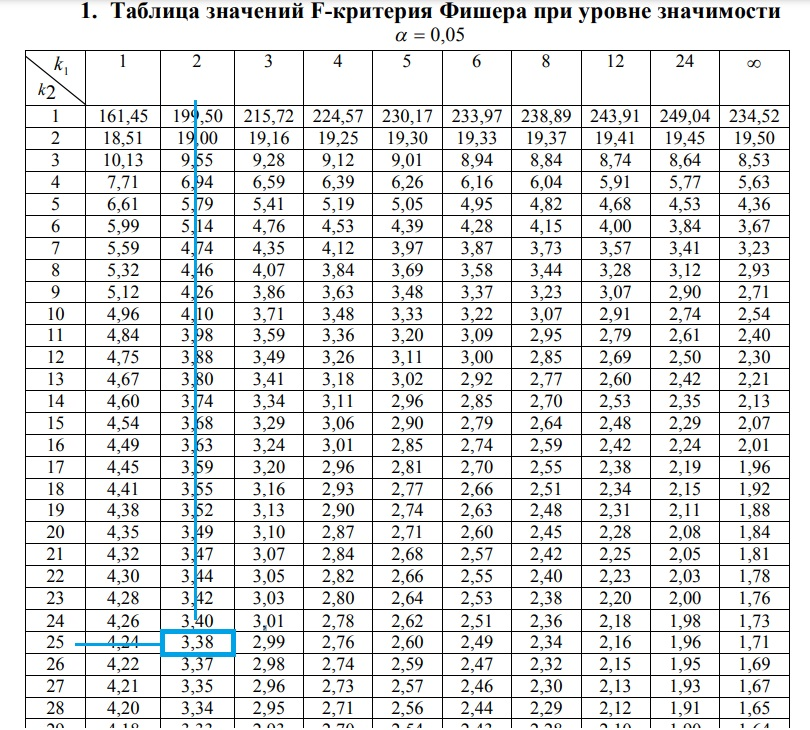

<div class="alert alert-block alert-success"><em>
<b>Ответ:</b><br> Это ответ !
</em></div>

***

(array([0., 0., 0., 0.]),
 array([  0,  25,  50,  75, 100]),
 <BarContainer object of 4 artists>)

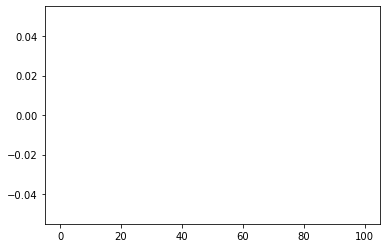

In [26]:
plt.hist(f_n, bins = [0, 25, 50, 75, 100])

In [18]:
f_n

array([173, 175, 180, 178, 177, 185, 183, 182])

In [19]:
f_nor

array([[0.34138495, 0.34533159, 0.35519821, 0.35125156, 0.34927824,
        0.36506483, 0.36111818, 0.35914486]])